In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('importCleaned.csv')
df.info()
df.head()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   imports  34 non-null     object 
 1   2000     34 non-null     float64
 2   2001     34 non-null     float64
 3   2002     34 non-null     float64
 4   2003     34 non-null     float64
 5   2004     34 non-null     float64
 6   2005     34 non-null     float64
 7   2006     34 non-null     float64
 8   2007     34 non-null     float64
 9   2008     34 non-null     float64
 10  2009     34 non-null     float64
 11  2010     34 non-null     float64
 12  2011     34 non-null     float64
 13  2012     34 non-null     float64
 14  2013     34 non-null     float64
 15  2014     34 non-null     float64
 16  2015     34 non-null     float64
 17  2016     34 non-null     float64
 18  2017     34 non-null     float64
 19  2018     34 non-null     float64
dtypes: float64(19), object(1)
memory usage: 5.4+ KB


,imports,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,1257.0,1432.0,1447.0,1336.0,1538.0,1577.0,1601.0,1968.0,1901.0,1309.0,1369.0,1452.0,1559.0,1555.0,0.0,0.0,0.0,0.0,0.0
1,Belgium,3491.0,3209.0,3792.0,3818.0,3968.0,4063.0,4605.0,4014.0,6792.0,5916.0,5924.0,5828.0,5668.0,5502.0,0.0,0.0,0.0,0.0,0.0
2,Bulgaria,281.0,355.0,343.0,400.0,367.0,441.0,435.0,393.0,517.0,523.0,528.0,482.0,560.0,609.0,0.0,0.0,0.0,0.0,0.0
3,Croatia,344.0,352.0,371.0,393.0,388.0,392.0,404.0,414.0,405.0,394.0,394.0,391.0,384.0,413.0,0.0,0.0,0.0,0.0,0.0
4,Cyprus,69.0,59.0,57.0,59.0,59.0,80.0,74.0,71.0,78.0,72.0,77.0,82.0,84.0,94.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2577.676471,2616.147059,2684.294118,2747.000000,2818.970588,2834.617647,2987.352941,3078.117647,3141.029412,3073.911765,3210.205882,3288.617647,3328.617647,3409.647059,1288.676471,1308.470588,1358.176471,1378.055484,1356.119304
std,4694.852905,4452.344599,4562.339495,4716.287735,4898.082825,4826.150056,5105.277483,5258.548468,5329.922016,5200.654903,5418.707823,5662.374724,5730.431789,5812.805800,4899.841127,4939.391075,5133.073829,5230.205856,5131.318623
min,9.000000,9.000000,10.000000,11.000000,16.000000,16.000000,29.000000,16.000000,23.000000,14.000000,12.000000,17.000000,21.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.250000,279.500000,272.250000,292.500000,302.500000,313.750000,338.750000,368.250000,393.750000,398.250000,380.500000,400.500000,397.750000,419.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,810.000000,883.500000,892.500000,986.000000,959.500000,962.000000,920.500000,1016.000000,968.500000,908.500000,1012.500000,1005.000000,1101.500000,1123.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2868.500000,2991.250000,2918.250000,3132.500000,3193.500000,3249.000000,3422.000000,3718.500000,3590.250000,3455.250000,3936.000000,3988.250000,3980.250000,4006.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23767.000000,21415.000000,21639.000000,22760.000000,23184.000000,23042.000000,23709.000000,24219.000000,24277.000000,23578.000000,24378.000000,26093.000000,26056.000000,27016.000000,27565.000000,27708.000000,28838.000000,29487.886464,28918.207055


In [3]:
df.corr()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2000,1.000000,0.995606,0.993289,0.994665,0.991744,0.992519,0.988190,0.983891,0.978540,0.981500,0.978895,0.983848,0.979725,0.985938,0.800568,0.800116,0.799241,0.798774,0.798413
2001,0.995606,1.000000,0.999420,0.999153,0.997331,0.997530,0.995644,0.993681,0.987601,0.990946,0.989805,0.992401,0.989696,0.993840,0.760798,0.760495,0.759915,0.759266,0.758824
2002,0.993289,0.999420,1.000000,0.999222,0.997852,0.997779,0.996763,0.994880,0.990562,0.993095,0.992290,0.994291,0.991653,0.995256,0.752730,0.752474,0.751982,0.751262,0.750774
2003,0.994665,0.999153,0.999222,1.000000,0.998186,0.998372,0.996684,0.995484,0.990416,0.992567,0.991718,0.994312,0.991926,0.995724,0.763178,0.762602,0.762471,0.762223,0.761712
2004,0.991744,0.997331,0.997852,0.998186,1.000000,0.999510,0.999308,0.997872,0.993763,0.995502,0.995105,0.996760,0.995429,0.998021,0.745248,0.744810,0.744340,0.743879,0.743410
2005,0.992519,0.997530,0.997779,0.998372,0.999510,1.000000,0.998975,0.997192,0.993704,0.995364,0.994809,0.996592,0.994864,0.998266,0.754132,0.753797,0.753281,0.752732,0.752366
2006,0.988190,0.995644,0.996763,0.996684,0.999308,0.998975,1.000000,0.998519,0.996039,0.997520,0.997298,0.997938,0.996895,0.998827,0.729435,0.729061,0.728582,0.728059,0.727639
2007,0.983891,0.993681,0.994880,0.995484,0.997872,0.997192,0.998519,1.000000,0.994958,0.995996,0.996537,0.997153,0.997166,0.998138,0.720937,0.720233,0.720322,0.720354,0.719912
2008,0.978540,0.987601,0.990562,0.990416,0.993763,0.993704,0.996039,0.994958,1.000000,0.998798,0.998652,0.998228,0.997849,0.996999,0.708709,0.708010,0.708010,0.708049,0.707667
2009,0.981500,0.990946,0.993095,0.992567,0.995502,0.995364,0.997520,0.995996,0.998798,1.000000,0.999685,0.999308,0.998942,0.998209,0.704732,0.704175,0.703927,0.703780,0.703487


In [4]:
#picking year 2013 because the data are missing for most country from 2014 onwards

X = df.iloc[:34,[1,14]]
print(X)

       2000     2013
0    1257.0   1555.0
1    3491.0   5502.0
2     281.0    609.0
3     344.0    413.0
4      69.0     94.0
5     809.0   1184.0
6    1022.0    921.0
7     105.0    156.0
8    1063.0   1275.0
9    6520.0   6713.0
10  13895.0  21174.0
11    798.0   1269.0
12    790.0    557.0
13    155.0    233.0
14   6315.0   8823.0
15    181.0    161.0
16    213.0    362.0
17    232.0    378.0
18      9.0     22.0
19   2966.0   3407.0
20   2576.0   3284.0
21    811.0   1063.0
22    552.0    971.0
23    286.0    798.0
24    187.0    258.0
25   3768.0   5137.0
26   1344.0   1709.0
27   3012.0   4206.0
28   6908.0   8381.0
29    662.0    781.0
30   1890.0   4410.0
31   1171.0   2667.0
32    192.0    439.0
33  23767.0  27016.0


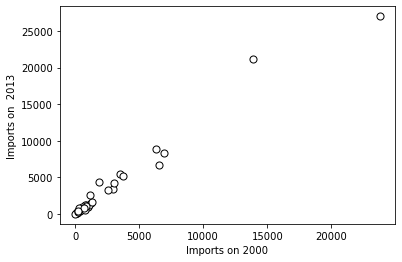

In [5]:
x_= df.iloc[:34,1]
y_= df.iloc[:34,14]
plt.scatter(
   x_, y_,
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel("Imports on 2000")
plt.ylabel("Imports on  2013")
plt.show()

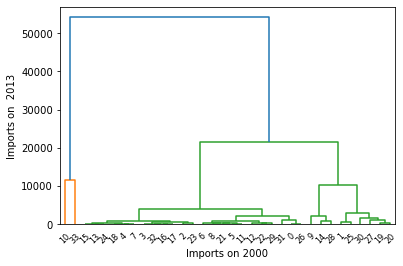

In [6]:
data = list(zip(df.iloc[:34,1],df.iloc[:34,14]))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel("Imports on 2000")
plt.ylabel("Imports on  2013")
plt.show()

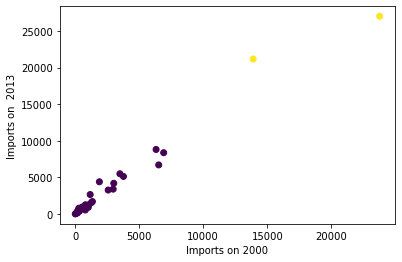

In [7]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(df.iloc[:34,1],df.iloc[:34,14], c=labels)
plt.xlabel("Imports on 2000")
plt.ylabel("Imports on  2013")
plt.show()

In [8]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

print("Davies Bouldin Score:", davies_bouldin_score(X, labels))
print("Calinski Harabasz Score:", calinski_harabasz_score(X, labels))
print("Silhouette Score:", silhouette_score(X, labels))

Davies Bouldin Score: 0.29334601364162866
Calinski Harabasz Score: 126.57730040209377
Silhouette Score: 0.8583509481057332
